<a href="https://colab.research.google.com/github/amimulhasan/ML_project/blob/main/hepatitis_c_prediction_eda_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
Predicting Hepatitis C Progression: Differentiating Blood Donors from Hepatitis C Patients and Assessing Disease Progression Levels (Hepatitis C, Fibrosis, Cirrhosis)

## Domain Knowledge
Hepatitis is a term that refers to inflammation of the liver. It can be caused by various factors, including viruses, alcohol abuse, certain medications, autoimmune disorders, and metabolic diseases. The most common types of viral hepatitis are Hepatitis A, Hepatitis B, and Hepatitis C.<br>
Hepatitis can have a wide range of symptoms, or it may be asymptomatic in some cases. Common symptoms include fatigue, jaundice (yellowing of the skin and eyes), abdominal pain, loss of appetite, nausea, and dark urine. However, the severity and duration of symptoms can vary depending on the type of hepatitis and the individual's immune response.
## Why Random Forest
These advantages make Random Forest a popular choice for classification tasks, especially when accuracy, robustness, and interpretability are important considerations.
* **High accuracy:** Random Forest is known for its high prediction accuracy. It combines multiple decision trees and aggregates their predictions, resulting in a robust and accurate model.
* **Reduced overfitting:**By aggregating multiple decision trees, Random Forest reduces the risk of overfitting compared to a single decision tree. The ensemble nature of Random Forest helps generalize well to unseen data.
* **Handles large datasets:**Random Forest can effectively handle large datasets with a large number of features. It can efficiently handle high-dimensional data without requiring extensive data preprocessing.

## Importing the necessary Python libraries <a class="anchor"  id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a><h2>Loading Dataset</h2> <a class="anchor"  id="chapter2"></a>

In [2]:
df = pd.read_csv('HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


#### Now let’s have a look at all the columns the dataset contains:

In [3]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [4]:
df.shape

(615, 14)

**Dataset contains 615 records and 14 columns**

**If you see first column which is unnecessory column. So, will drop it.**

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.shape

(615, 13)

#### Before moving forward, always have a look if your data contains any missing values or not:

In [7]:
df.isnull().sum()

,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0
CHOL,10


**ALB, ALP, ALT, CHOL AND PROT** columns contains null values.

## Handle missing values <a class="anchor"  id="chapter3"></a>

In [8]:
df.dropna(how='any',inplace=True)

**We'll remove the rows from our dataset that have null values.**

In [9]:
df.shape

(589, 13)

#### Let’s have a look at the column info:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    object 
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 64.4+ KB


**Except for the Sex and Category columns, all columns are numeric.**

## EDA <a class="anchor"  id="chapter4"></a>

**Exploratory data analysis (EDA) is a Data Science concept where we analyze a dataset to discover patterns, trends, and relationships within the data.**

#### Category column

In [11]:
df.Category.value_counts()

,count
Category,
0=Blood Donor,526
3=Cirrhosis,24
1=Hepatitis,20
2=Fibrosis,12
0s=suspect Blood Donor,7


In [12]:
fig = px.bar(
    df.Category.value_counts(),
    color_discrete_sequence=['darkblue'],
    title='Distribution of Category column',
)
fig.update_layout(
    xaxis_title = "Category",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)
fig.show()

#### Age column

In [13]:
age_counts = df.Age.value_counts()

In [14]:
fig = px.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)
fig.show()

In [15]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

#### Sex column

In [16]:
df.Sex.value_counts()

,count
Sex,
m,363
f,226


In [17]:
px.pie(df,names='Sex',title='Gender Overview',hole=0.8)

#### Other columns

In [18]:
df.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

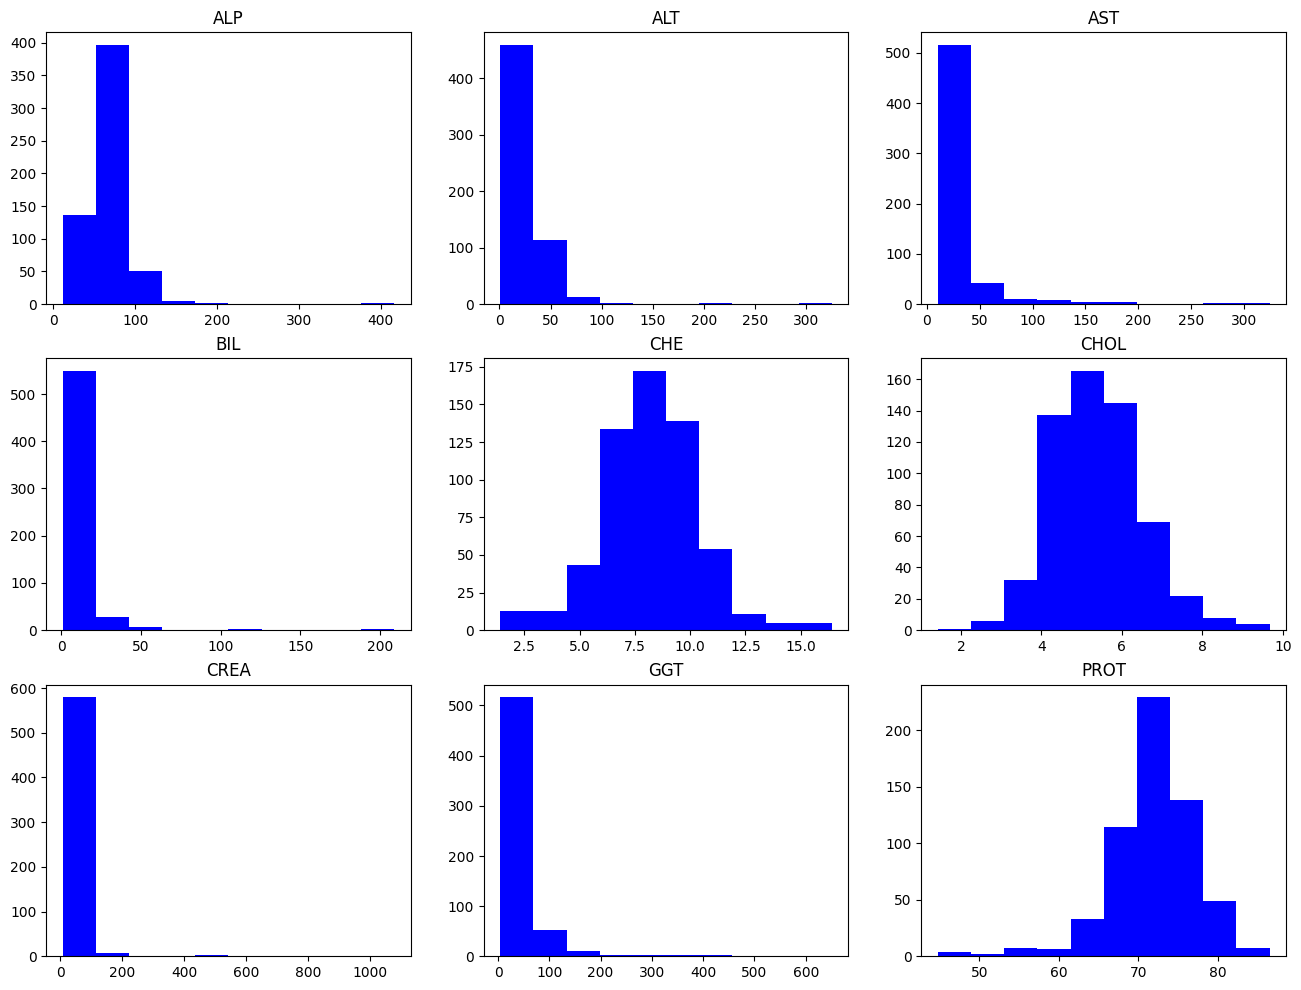

In [19]:
plt.figure(figsize=(16,12))
col_list = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
            'CHOL', 'CREA', 'GGT', 'PROT'
           ]
for i in range(1,len(col_list)):
    plt.subplot(3,3,i)
    plt.hist(df[col_list[i]],color='b',bins=10);
    plt.title(col_list[i])

## Data Pre-processing and Data Preparation <a class="anchor"  id="chapter5"></a>

In [20]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [21]:
df.Category = df.Category.apply(lambda x : x.split('=')[0])

In [22]:
def helper(x):
    if x == '0s':
        return '4'
    return x

In [23]:
df.Category = df.Category.apply(helper)

In [24]:
df.Category = df.Category.astype('int64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    int64  
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    object 
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 64.4+ KB


In [26]:
def encode_gender(gender):
    if gender == 'm':
        return 0
    return 1

In [27]:
df.Sex = df.Sex.apply(encode_gender)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 589 entries, 0 to 612
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  589 non-null    int64  
 1   Age       589 non-null    int64  
 2   Sex       589 non-null    int64  
 3   ALB       589 non-null    float64
 4   ALP       589 non-null    float64
 5   ALT       589 non-null    float64
 6   AST       589 non-null    float64
 7   BIL       589 non-null    float64
 8   CHE       589 non-null    float64
 9   CHOL      589 non-null    float64
 10  CREA      589 non-null    float64
 11  GGT       589 non-null    float64
 12  PROT      589 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 64.4 KB


In [28]:
X = df.drop('Category',axis=1)
y = df.Category

In [29]:
from imblearn.combine import SMOTETomek

In [30]:
smk = SMOTETomek(random_state=42)
X_smote,y_smote = smk.fit_resample(X,y)

In [31]:
print(f'Before oversampling :{X.shape}')
print(f'After oversampling :{X_smote.shape}')

Before oversampling :(589, 12)
After oversampling :(2630, 12)


In [32]:
y_smote.value_counts()

,count
Category,
0,526
4,526
1,526
2,526
3,526


In [33]:
fig = px.bar(
    y_smote.value_counts(),
    color_discrete_sequence=['darkblue'],
    title='Distribution of Category column after oversampling',
)
fig.update_layout(
    xaxis_title = "Category",
    yaxis_title = "Frequency",
    title_x = 0.5,
    showlegend = False
)
fig.show()

In [34]:
X_smote.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### Split Data

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

In [36]:
X_train.shape,X_test.shape

((2104, 12), (526, 12))

## Feature Engineering <a class="anchor"  id="chapter6"></a>

#### Correlation between all the features:

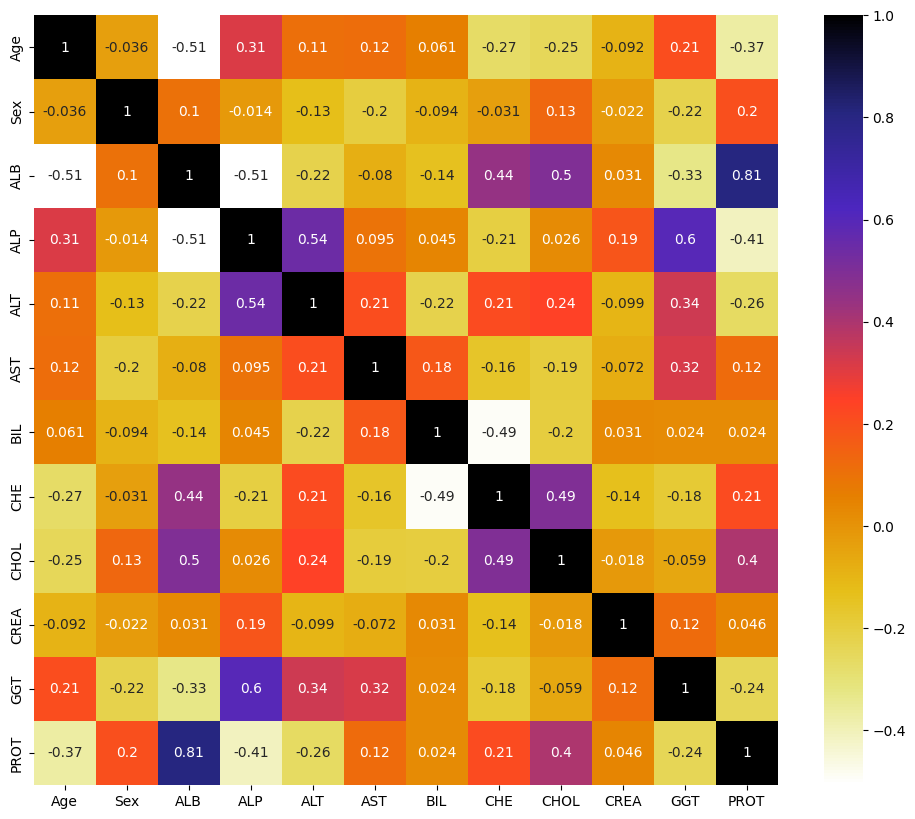

In [37]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show();

In [38]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(X_train,0.8)
corr_features

{'PROT'}

In [40]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [41]:
const_cols = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
const_cols

[]

In [42]:
X_train.drop('PROT',axis=1,inplace=True)
X_test.drop('PROT',axis=1,inplace=True)

## Modeling and Evaluation <a class="anchor"  id="chapter7"></a>

#### Logistic Regression

In [43]:
models = {
    'modelName':[],
    'modelAccuracy':[]
}

In [44]:
logReg = LogisticRegression()
models['modelName'].append('Logistic Regression')
logReg.fit(X_train,y_train)
models['modelAccuracy'].append(logReg.score(X_test,y_test)*100)

In [45]:
y_pred = logReg.predict(X_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       110
           1       0.83      0.78      0.81       109
           2       0.78      0.83      0.81        95
           3       0.97      0.99      0.98       108
           4       0.97      1.00      0.99       104

    accuracy                           0.91       526
   macro avg       0.91      0.91      0.91       526
weighted avg       0.91      0.91      0.91       526



#### Decision Tree

In [47]:
dt = DecisionTreeClassifier()
models['modelName'].append('Decision Tree')
dt.fit(X_train,y_train)
models['modelAccuracy'].append(dt.score(X_test,y_test)*100)

In [48]:
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       110
           1       0.98      0.98      0.98       109
           2       0.99      1.00      0.99        95
           3       0.96      1.00      0.98       108
           4       0.97      0.99      0.98       104

    accuracy                           0.98       526
   macro avg       0.98      0.98      0.98       526
weighted avg       0.98      0.98      0.98       526



#### Random Forest

In [49]:
rf = RandomForestClassifier()
models['modelName'].append('Random Forest')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
models['modelAccuracy'].append(rf.score(X_test,y_test)*100)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       110
           1       0.99      0.99      0.99       109
           2       0.99      1.00      0.99        95
           3       0.99      1.00      1.00       108
           4       0.99      1.00      1.00       104

    accuracy                           0.99       526
   macro avg       0.99      0.99      0.99       526
weighted avg       0.99      0.99      0.99       526



In [50]:
model_df = pd.DataFrame(models)

In [51]:
model_df

,modelName,modelAccuracy
0,Logistic Regression,91.444867
1,Decision Tree,98.098859
2,Random Forest,99.239544


In [52]:
fig = px.bar(
    x=model_df.modelName,
    y=model_df.modelAccuracy,
    color_discrete_sequence=['deepskyblue'],
    title='Model and its accuracy',
)
fig.update_layout(
    xaxis_title = "Models",
    yaxis_title = "Accuracy",
    title_x = 0.5,
    showlegend = False
)
fig.show()

**Results showed the random forest model was able to predict Hepatitis C with 99% accuracy.**